In [32]:
import dlib
import cv2
import matplotlib.pyplot as plt
from imutils import face_utils
import numpy as np

In [34]:
def get_6_main_keypoints(key_points):
    # nose 31
    # chin 9
    # left eye left corner 37
    # right eye right corner 46
    # Left Mouth corner 49
    # Right mouth corner 55
    return key_points[[30,8,36,45,48,54]]
    


In [35]:
# !wget https://github.com/davisking/dlib-models/blob/master/shape_predictor_68_face_landmarks.dat.bz2 models
# !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

In [40]:
im = cv2.imread("headPose.jpg");
size = im.shape
# img = cv2.imread('headPose.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [41]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('data\shape_predictor_68_face_landmarks.dat')
rects = detector(gray, 0)

In [42]:
for rect in rects:
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    image_pints = get_6_main_keypoints(shape)
    # extract the left and right eye coordinates, then use the
    # coordinates to compute the eye aspect ratio for both eyes


In [46]:
model_points = np.array([
                            (0.0, 0.0, 0.0),             # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-225.0, 170.0, -135.0),     # Left eye left corner
                            (225.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner
                        
                        ])


# Camera internals

focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )

print("Camera Matrix :\n {0}".format(camera_matrix))

dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
(success, rotation_vector, translation_vector) = cv2.solvePnP(model_points, image_pints, camera_matrix, dist_coeffs)

print("Rotation Vector:\n {0}".format(rotation_vector))
print("Translation Vector:\n {0}".format(translation_vector))


# Project a 3D point (0, 0, 1000.0) onto the image plane.
# We use this to draw a line sticking out of the nose


(nose_end_point2D, jacobian) = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)

for p in image_pints:
    cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,0,255), -1)


p1 = ( int(image_pints[0][0]), int(image_pints[0][1]))
p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))

cv2.line(im, p1, p2, (255,0,0), 2)


Camera Matrix :
 [[1.200e+03 0.000e+00 6.000e+02]
 [0.000e+00 1.200e+03 3.375e+02]
 [0.000e+00 0.000e+00 1.000e+00]]


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-vijyisc5\opencv\modules\calib3d\src\solvepnp.cpp:802: error: (-215:Assertion failed) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) || (npoints >= 3 && flags == SOLVEPNP_SQPNP) ) && npoints == std::max(ipoints.checkVector(2, CV_32F), ipoints.checkVector(2, CV_64F)) in function 'cv::solvePnPGeneric'


In [28]:
image_pints[:,0]

array([361, 395, 341, 509, 348, 460])

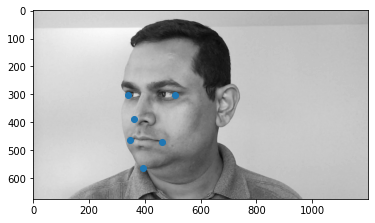

In [30]:
plt.imshow(gray, cmap='gray')

plt.scatter(image_pints[:,0], image_pints[:,1])

In [22]:
draw = cv2.drawContours(gray, [shape[36:42]], 0, (255,255,255), 2)

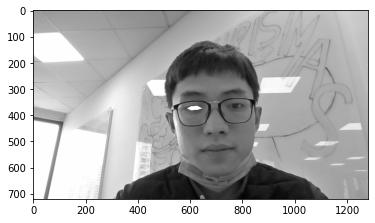

In [23]:
plt.imshow(gray, cmap='gray')

In [17]:
rect.__getstate__()

(b'\x02\x1e\x02\x02.\x01\x02T\x03\x02c\x02',)

In [11]:
dlib.dlib.rectangle()

dlib.dlib.rectangle